<img src="./img/logo_UTN.svg" align="right" width="300" />

# Informe TPLAB1 - Teoría de Circuitos 2
### Autor: Santiago Palozzo


| <!-- -->      | <!-- -->        |
|:-------------:|:---------------:|
| **Curso**| R4001|
| **Docente**| Mariano Llamedo Soria|
| **JTP**| Cesar Fuoco| 
| **ATP**| Israel Pavelek|


# Introducción

El Trabajo Práctico de Laboratorio N°1 consiste en la síntesis de un filtro activo mediante el uso del circuito integrado UAF42. El mismo es un filtro con arquitectura del tipo variable de estados. Posee una característica especial: capacitores integrados de muy baja tolerancia, aproximadamente del 1%. Esto permite obtener respuestas en frecuencia del filtro sumamente similares a las simulaciones.

En este informe se describe en particular la experiencia del diseño de un filtro pasabanda Chebyshev. A continuación se detallan las especificaciones del diseño:


|Función de aproximación|Frecuencia central|Q|Atenuación máxima<br>en banda de paso|Atenuación mínima en<br>banda de stop (ambas)|
|:-------:|:---:|:---:|:----:|:-----------------------------:|
|Chebyshev|6 kHz|  3  |2.5 dB|15 dB @ 0.6 kHz<br>15 dB @ 60 kHz|




# Objetivos

- Consolidar los conceptos de teoría moderna mediante la implementación circuital.
- Simular e implementar el filtro con componentes activos de precisión.
- Medir las partes de la función transferencia para frecuencias menores a 100 kHz.


# Diseño del filtro
El diseño de la función transferencia consiste en los siguientes pasos, tomando como parámetros los valores indicados en la consigna.

- Obtención del orden del filtro y el $\xi$.
- Obtención de la función transferencia en el dominio de Laplace. Identificar polos y ceros.
- Síntesis de los valores de los componentes externos del circuito UAF42.

### Función transferencia





In [11]:
from IPython.display import IFrame
IFrame("./desarrollos_papel/desarrollo_transferencia.pdf", width=800, height=800)

### Simulación en Python

In [2]:
#%% Inicializacion de librerias
# Librerías externas NumPy, SciPy y Matplotlib
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np

# Librería de TC2
import pytc2.sistemas_lineales as tc2

#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías

- Aproximacion de Chebyshev -
Epsilon2=  0.7782794100389228
Grado del filtro:  1

Transferencia Pasabajos como SOS


<IPython.core.display.Math object>


Transferencia Pasabanda como SOS


<IPython.core.display.Math object>

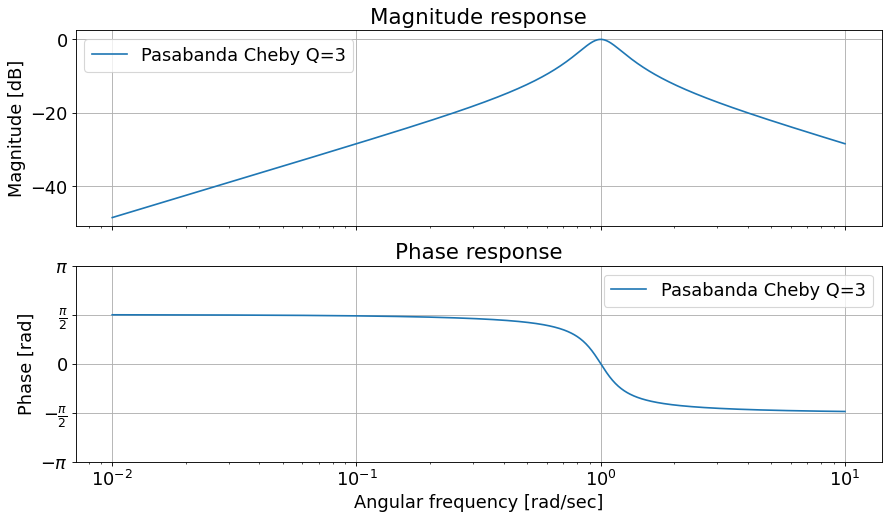

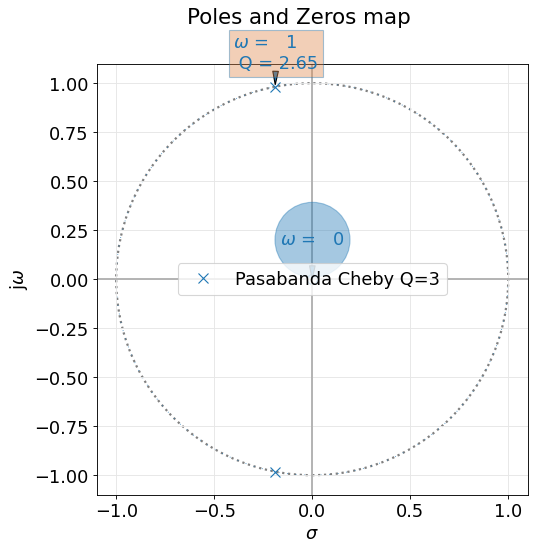

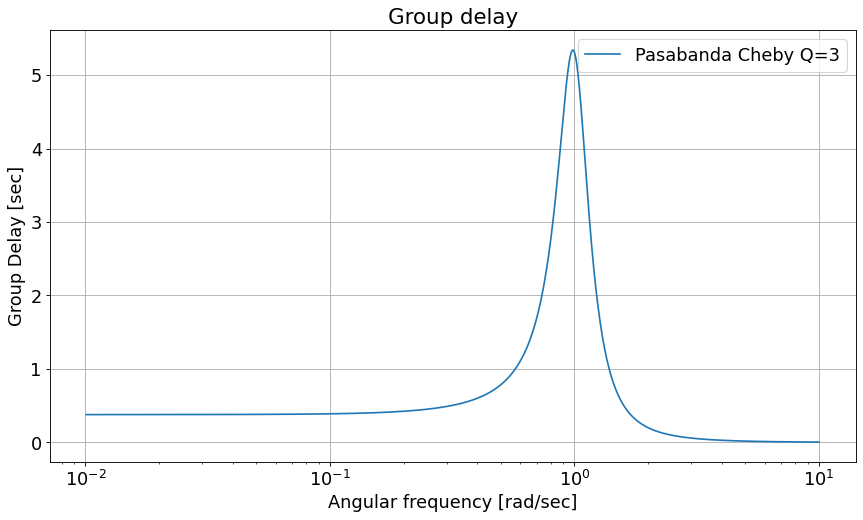

In [3]:
#Defino los parametros de la plantilla
w0=1
ws1=0.1
ws2=10

Ws= 29.7

alfa_max= 2.5   #en dB
alfa_min= 15    #en dB
Q_bp= 3

ee2= 10**(alfa_max/10) - 1

alfa=0
n=0

while(alfa<alfa_min):
    n+=1
    alfa= 10* np.log10(1 + (ee2 * np.cosh(n*np.arccosh(Ws))**2))

print("- Aproximacion de Chebyshev -")
print("Epsilon2= ",ee2)
print("Grado del filtro: ",n)

plt.close('all')

#Generacion del filtro

z,p,k= sig.cheb1ap(n, alfa_max)
num_lp, den_lp= sig.zpk2tf(z,p,k)
tf_lp= sig.TransferFunction(num_lp,den_lp)

sos_lp = tc2.tf2sos_analog(num_lp, den_lp)
print("\nTransferencia Pasabajos como SOS")
tc2.pretty_print_SOS(sos_lp)

#tc2.analyze_sys(tf_lp, sys_name="Prototipo Cheby Pasabajo")

#Transformacion a pasabanda

num_bp, den_bp= sig.lp2bp(num_lp, den_lp, bw = 1/Q_bp)
tf_bp= sig.TransferFunction(num_bp, den_bp)

sos_bp = tc2.tf2sos_analog(num_bp, den_bp)
print("\nTransferencia Pasabanda como SOS")
tc2.pretty_print_SOS(sos_bp)

tc2.analyze_sys(tf_bp, sys_name="Pasabanda Cheby Q=3")

### Valores de los componentes

Para el armado del circuito pasabanda utilizando el integrado UAF42 se siguió el circuito no inversor propuesto por el fabricante en la hoja de datos:

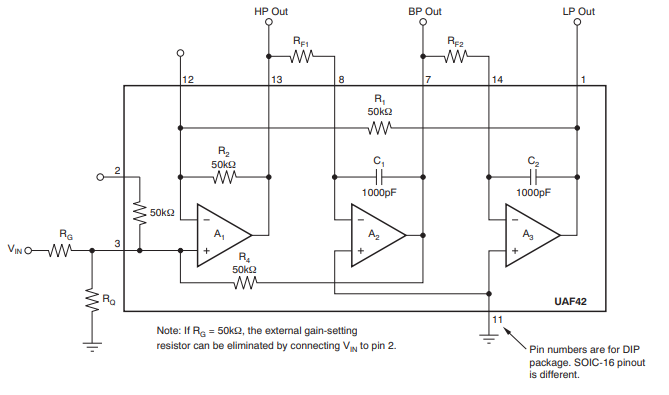

In [12]:
from IPython.display import IFrame
IFrame("./desarrollos_papel/desarrollo_componentes.pdf", width=800, height=800)

# Simulación circuital

En las primeras imágenes se observa el circuito simulado, junto con el diagrama de bode correspondiente al mismo. Luego se muestra el análisis detallado de las frecuencias que componen la banda de paso y la de eliminación respectivamente.

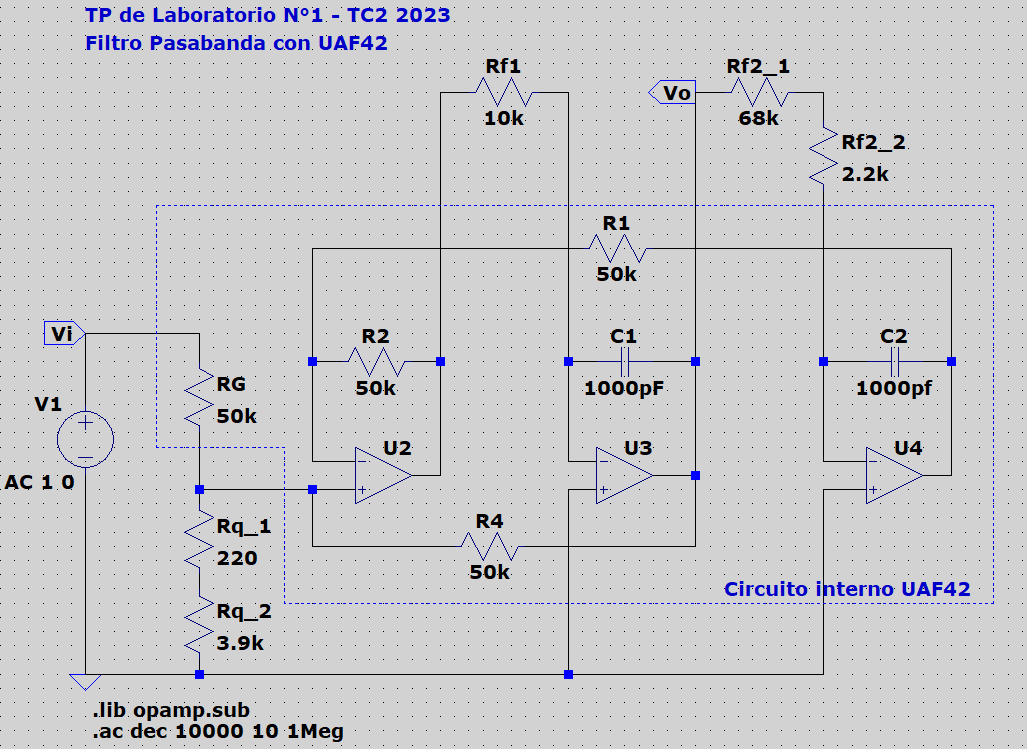

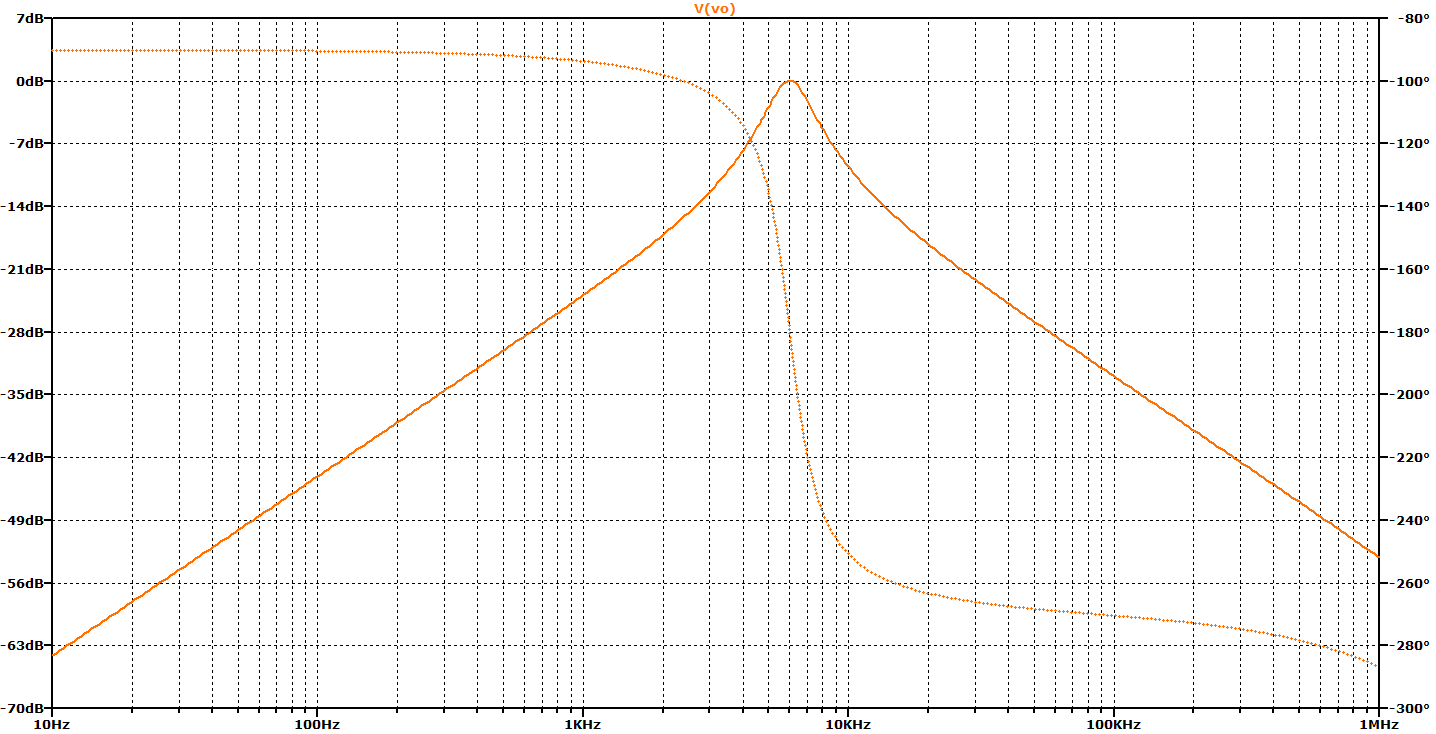

### Análisis de la banda de paso del filtro

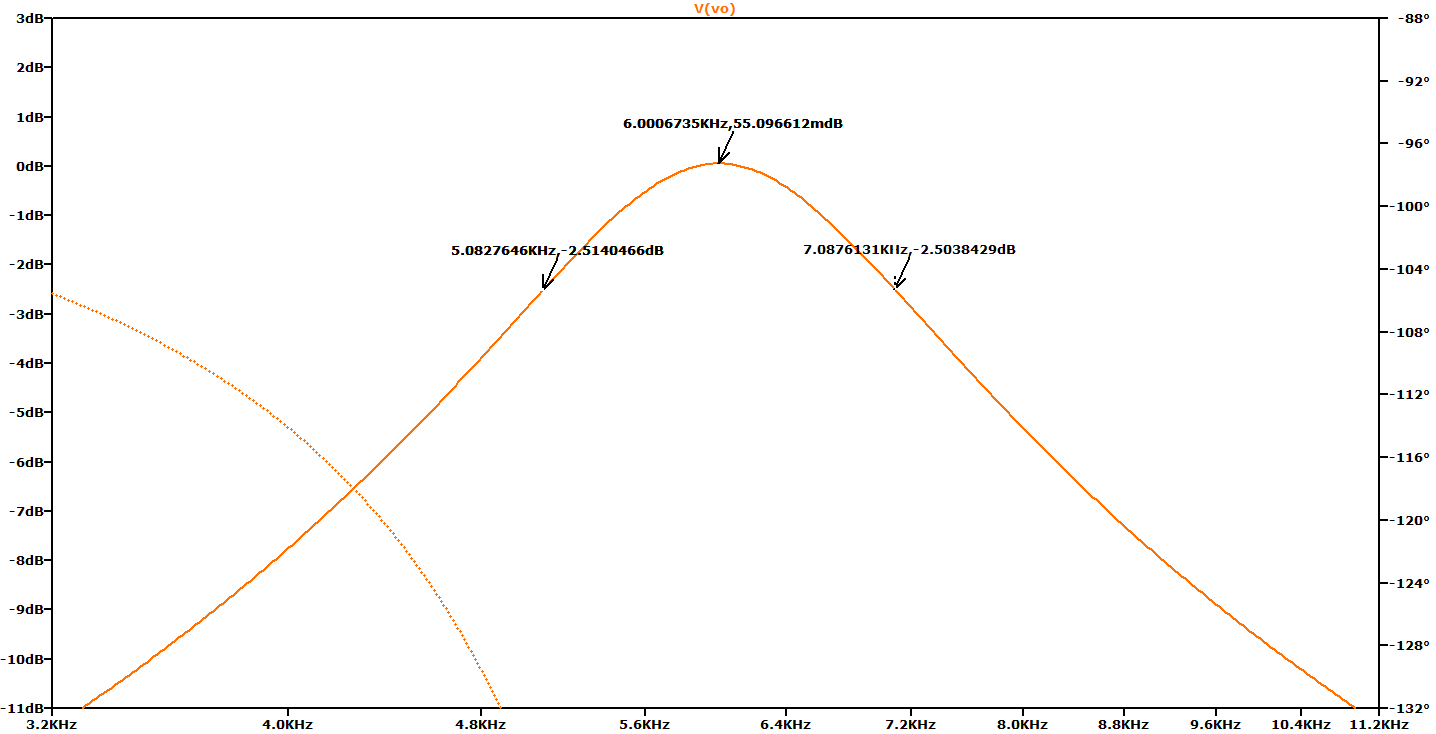

### Análisis de las bandas de eliminación del filtro

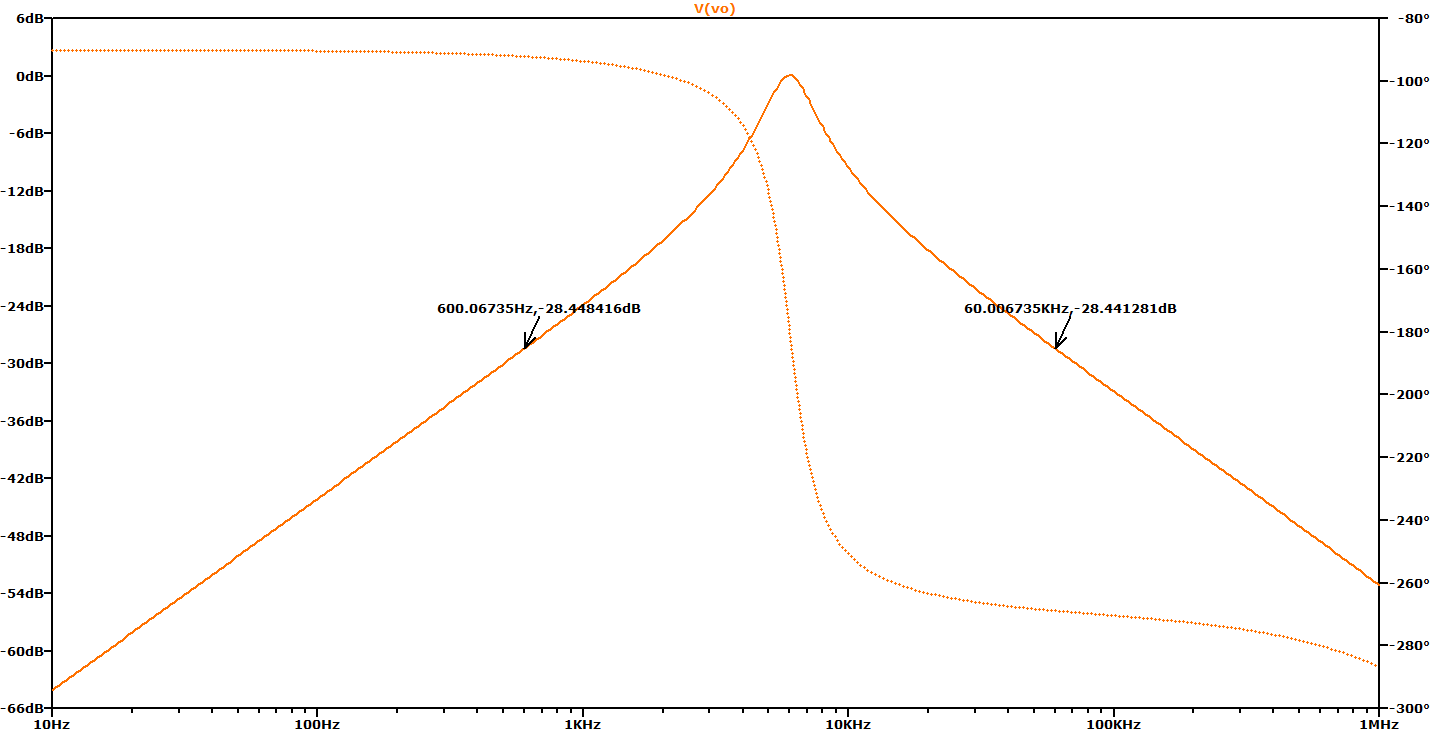

# Armado del circuito

El circuito se implementó respetando la topología no inversora provista por la hoja de datos del fabricante. El mismo fue simulado en LTspice para luego implementarse sobre una placa universal multiperforada. Esta placa contiene todas las conexiones soldadas para evitar falsos contactos y también testpoints para conectar los equipos de laboratorio, tanto la fuente de alimentación como los instrumentos de medición.

La placa fue armada y verificado su funcionamiento previo a la práctica de laboratorio de forma que se evitaron contratiempos inesperados el día de la práctica.

### Esquemático

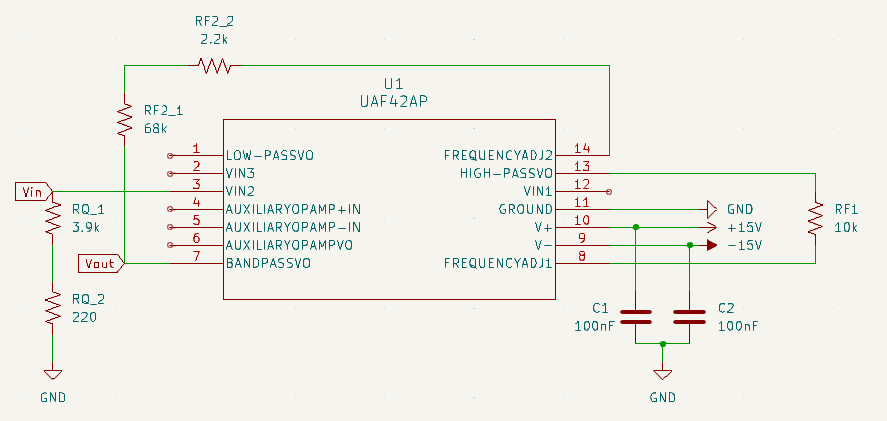

La tensión de entrada se inyecta por el pin 2 del UAF42 mientras que la salida se mide en el pin 7 del integrado.

### Lista de componentes

|Componente|Tipo|Cantidad|
|:----------:|:----:|:--------:|
|Resistencia|68 kΩ|1|
|Resistencia|10 kΩ|1|
|Resistencia|3.9 kΩ|1|
|Resistencia|2.2 kΩ|1|
|Resistencia|220 Ω|1|
|Capacitor|100 nF|2|
|Zócalo|DIP14|1|
|Filtro activo|UAF42|1|
|Placa|Universal|1|



### Imágenes

- Frente de la placa

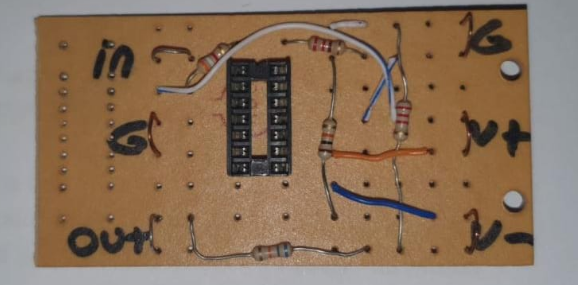

- Reverso de la placa

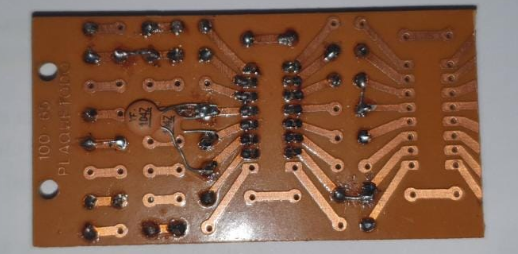

# Mediciones

### Diagrama del banco de ensayos

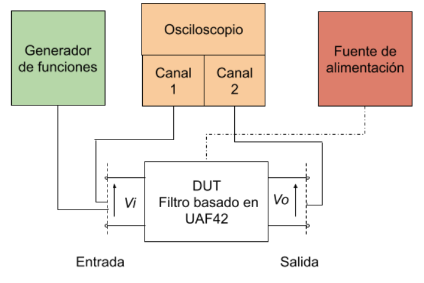

### Instrumental utilizado

|Instrumento|Marca|Modelo|Cantidad|
|:----------:|:----:|:--------:|:--------:|
|Fuente de alimentación|V&A Instruments|HY3005D|2|
|Osciloscopio|GW Instek|GDS-1102A-U|1|
|Generador de funciones|Twintex|TFG-3205E|1|

Las fuentes se utilizaron como fuente partida para lograr una tensión de alimentación de ±15V. Este valor se eligió teniendo en cuenta la especificación del fabricante, el cuál detalla como valor máximo ±18V. Con la alimentación elegida se pueden lograr buenas mediciones ya que el rango dinámico permite que la señal no se recorte.

El generador de señales fue variando su frecuencia para poder efectuar el barrido, manteniendo una tensión senoidal de 10 Vpp

Luego de realizadas las mediciones individuales de cada equipo de trabajo se realizó un barrido en frecuencia con un analizador de audio marca Agilent, modelo U8903A.

### Procedimientos

#### 1. Medicion del módulo

Para la medición del módulo se realizó un barrido en frecuencia desde 400 Hz hasta 65 kHz, tomando puntos intermedios en este intervalo para poder caracterizar correctamente la funcion transferencia. Se utilizaron puntas de prueba en los dos canales del osciloscopio, midiendo en el canal 1 la señal de entrada entregada por el generador de funciones, mientras que en el canal 2 se registró la señal de salida del circuito.

A partir de la tensión de entrada y de salida, se realizó el cociente entre las mismas para poder determinar la ganancia del filtro en veces. Luego, mediante la fórmula $$G_{[dB]} = 20\;\cdot\;log(G_{[veces]})$$ se convierte el valor de la ganancia de veces a dB.

Con los datos conseguidos se puede graficar el diagrama de Bode para el módulo de la transferencia:

#### 2. Medición de la fase

Para medir la respuesta de fase del filtro se tomaron mediciones de la diferencia temporal entre los cruces por cero de las señales de salida y entrada. A partir de este desfasaje temporal, y sabiendo que un periodo de la señal representa $2\pi\;[rad]$ se puede calcular la fase del filtro aplicando:  <br><br>
$$ \phi_{[rad]} = 2\pi \cdot f \cdot \Delta t$$

Sin embargo, notamos que en la práctica el circuito invertía la fase, por lo que la fórmula utilizada finalmente fue: <br><br>
$$ \phi_{[rad]} = 2\pi \cdot f \cdot \Delta t - \pi$$


#### 3. Retardo de grupo

El retardo de grupo se define como la derivada de la fase. Experimentalmente puede obtenerse mediante la derivación numérica de los valores calculados para la fase a partir de las muestras tomadas.

La fórmula de la derivada es: $$ f'(t) = \lim_{h \to 0} \frac{f(t+h) - f(t)}{h}$$

Sin embargo, para el calculo experimental del retardo de grupo nos limitamos a calcularlo como el cociente incremental, esto es: $$\tau(f) = \frac{\varphi(f+\Delta f) - \varphi(f)}{\Delta f}$$

Más allá de todo, el análisis del retardo de grupo en un filtro pasabanda carece de sentido físico ya que por su naturaleza, el filtro selecciona una frecuencia y a lo sumo algunas adyacentes que entren en la banda de paso. Señales poliarmónicas saldrán del filtro totalmente deformadas, por lo que no puede analizarse el retardo que se produce en una señal para un conjunto de frecuencias al ser afectadas por el circuito.

# Resultados

A continuación se muestran los gráficos realizados a partir de los barridos en frecuencia realizados en el laboratorio. Puede observarse como se reproduce la forma anticipada en las simulaciones, respetando los parámetros de diseño del filtro en la banda de paso y las bandas de eliminación.

### Barrido en frecuencia con osciloscopio y generador de señales

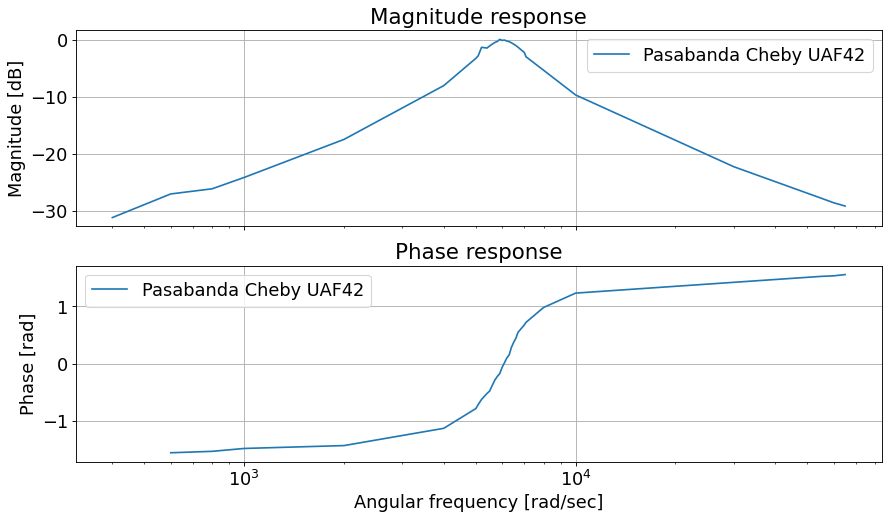

In [9]:
def bodePlot(modulo, fase, my_label, fig):
    '''
    Parameters
    ----------
    modulo : vector de 2 columnas
        Primera columna eje frecuencial, segunda ganancia en [dB]
    fase : vector de 2 columnas
        Primera columna eje frecuencial, segunda fase en [radianes]
    my_label : string
        Leyenda del grafico
    fig : int
        N° de figura

    Returns
    -------
    int
        DESCRIPTION.
    '''
    
    bode_plots= plt.figure(fig)
    mod_plot, fase_plot= bode_plots.subplots(2, 1, sharex=True)

    #bode_plots.suptitle('Diagramas de Bode')

    ## Ploteo el modulo
    plt.sca(mod_plot)
    mod_plot.plot(modulo[:,0], modulo[:,1], label=my_label)
    mod_plot.set(xscale='log')
    mod_plot.legend()
    mod_plot.grid()
    plt.ylabel('Magnitude [dB]')
    plt.title('Magnitude response')

    ## Ploteo la fase
    plt.sca(fase_plot)
    fase_plot.plot(fase[:,0], fase[:,1], label=my_label)
    fase_plot.set(xscale='log')
    fase_plot.legend()
    fase_plot.grid()
    plt.xlabel('Angular frequency [rad/sec]')
    plt.ylabel('Phase [rad]')
    plt.title('Phase response')
    plt.show()
    
    return None
#%%

#Levanto los archivos medidos del osciloscopio
modulo_osc= np.genfromtxt("./mediciones/mediciones_python/modulo_osciloscopio.csv", delimiter=";")
fase_osc=   np.genfromtxt("./mediciones/mediciones_python/fase_osciloscopio.csv", delimiter=";")


bodePlot(modulo_osc, fase_osc, 'Pasabanda Cheby UAF42', 1)

### Barrido en frecuencia utilizando el analizador de audio

Del mismo modo, se pueden levantar los datos provistos por el barrido en frecuencia del analizador de audio y graficarlos mediante Python:

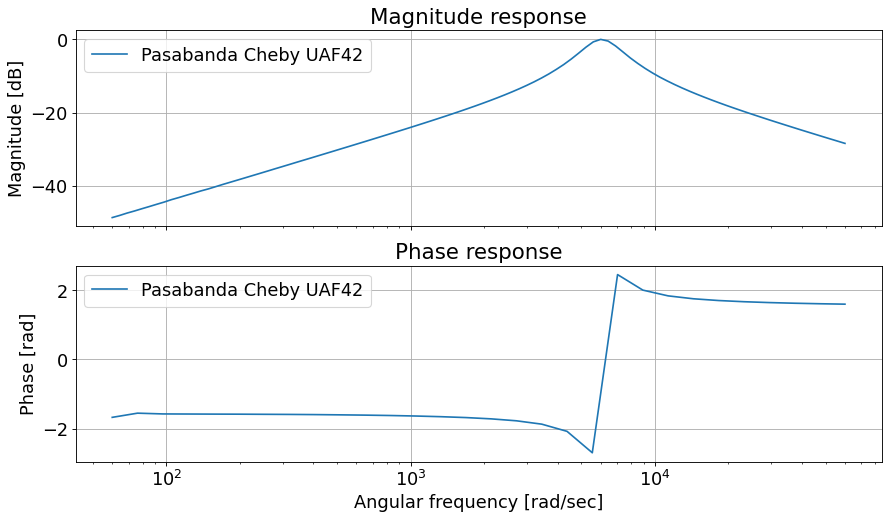

In [8]:
#Levanto los archivos del analizador de audio
modulo= np.genfromtxt("./mediciones/mediciones_python/barrido_modulo.csv", delimiter=",")
fase=   np.genfromtxt("./mediciones/mediciones_python/barrido_fase.csv", delimiter=",")
fase[:,1]= [item * np.pi/180 for item in fase[:,1] ] #Pasa de grados a radianes

bodePlot(modulo, fase, 'Pasabanda Cheby UAF42', 1)

# Conclusiones

- Se puede observar como los diagramas de bode obtenidos a partir del barrido en frecuencia del osciloscopio se condicen con los esperados mediante las simulaciones de Python en cuanto a la transferencia que implementa el circuito.
- Se observa que el circuito simulado en LTSpice y la simulación de la respuesta en frecuencia se ajusta a los gráficos obtenidos de la práctica, manteniendo la frecuencia central del pasabanda en aproximadamente 6 kHz y respetando el ancho de banda del mismo.
- Mediante el analizador de audio se obtienen las mismas curvas que parten del osciloscopio, por lo que se concluye que ambos métodos convergen a los mismos resultados. Las diferencias entre ambos gráficos radican en la suavidad de las curvas. Esto se debe a la separación entre frecuencias que utiliza el analizador de audio, generando gráficos más suaves.
- Como punto de mejora, se podrían haber implementado resistencias variables en la placa, de manera de poder ajustar los parámetros del circuito tales como la frecuencia central $\omega_0$ y el factor de selectividad $Q$. Esto podría haber permitido mayor precisión e incluso analizar la variación que producen en los resultados los cambios en los valores de los componentes.
- Se observó que si bien el circuito detallado en la datasheet es "no inversor", en la práctica la fase resulto estar invertida en 180° respecto de lo esperado. Igualmente, la fase en la frecuencia de paso del filtro sí es 0°, de modo que para las frecuencias que el filtro permita pasar, estas no tendrán inversion de fase.
